In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
# import matplotlib.cm as cm
# import timeit
import numberfun as nf
import numberdata as nd
import distinctipy
import seaborn as sns

In [8]:
def perf_data_builder(start=0, stop=5, step=1):
    """Returns lists of pseudo perfect numbers together with entropies of their
    partitions. A given number may have more than one partition."""

    return [(n, nf.perfection_entropy(n)) for n in nd.PSEUDOS[start:stop]]

def mult_data_builder(stop):
    """Builds the data for the multiplicity entropies"""
    values = nd.PRIMITIVES[nd.PRIMITIVES <= stop]
    result = np.vectorize(nf.multiplicity_entropy)(values)
    return np.column_stack((values, result))

nd.load_pseudos()
nd.load_primitives()
nd.load_primpracticals_x()

In [77]:
# perfection_entropies = []

In [4]:
"""Load saved perfection entropy values if any have been pre-computed and saved."""
def load_entropies_data():
    perfection_entropies = []
    with open("./perfection_entropy_data.txt", "r") as f:
        for line in f:
            perfection_entropies.append(line.split(", "))

    return [[int(p[0]), float(p[1].replace("\n", ""))] for p in perfection_entropies]

perfection_entropies = load_entropies_data()

In [5]:
"""Perfection entropy values are expensive to compute. Save generated ones."""
# def save_entropies_data(perfection_entropies):
#     """Saves generated values."""
#     perfections = ""
#     for i in perfection_entropies:
#         perfections += f"{i[0]}, {min(i[1])}\n"
        
#     with open("C:/Users/danko/iCloudDrive/Projects/Entropy/perfection_entropy_data2.txt", "w") as file:
#         file.write(str(perfection_entropies))
#         print("File saved")

In [80]:
"""Check the file with saved perfection entropy values. You can extend the
values here."""
# perfection_entropies.extend(perf_data_builder(6,30_000))

In [ ]:
"""Compute and categorise by multiplicity entropies as well as by prime
factorisation. Only for additional exploration of interaction of prime
divisors with perfections."""

def group_by_multiplicity(data):
    """Returns a list of values grouped according to their multiplicity
    entropies"""
    unique = set(np.array(data)[:, 1])
    groups = []
    for i in unique:
        groups.append([int(row[0]) for row in data if row[1] == i])
    
    return sorted(groups, key=lambda x: x[0]) # groups


def flatten_subset_lists(groups, practical_list):
    """Combine primitive practical numbers of the form 2^i * prime(k)"""
    result = []
    flattened = []
    
    for sublist in groups:
        # If sublist is a subset of nd.PRIM_PRACTICALS_X, flatten it
        if all(item in practical_list for item in sublist):
            flattened.extend(sublist)  # Flatten and collect subset lists
        else:
            result.append(sublist)  # Keep non-subset lists unchanged

    result.append(flattened)

    return sorted(result, key=lambda x: x[0])


def get_group_index(x):
    """Assigns an x_value to a colour determined by group membership."""
    for i, group in enumerate(groups):
        if x in group:
            return colourmap[i]

# Group primitive perfect numbers by unique multiplicity entropy values
multiplicity_entropies = mult_data_builder(perfection_entropies[-1][0] + 1)
groups = group_by_multiplicity(multiplicity_entropies)
# Combine primitive practical numbers of the form 2^i * prime(k)
groups = flatten_subset_lists(groups, nd.PRIM_PRACTICALS_X)
# Get colour map for grouped primitive perfect numbers
colourmap = distinctipy.get_colors(len(groups), pastel_factor=0.5)
# # Create category labels
# group_labels = ["2^i * prime(k)",]
# mulitplicities = [nf.factorint(g[0]) for g in groups[1:]]
# group_labels.extend(["".join([f"{v}," for v in m.values()]).rstrip(" , ") for m in mulitplicities])

In [30]:
import colorcet as cc

In [ ]:
palette = cc.m_glasbey_bw_minc_20_minl_30.colors

# Now you can access colours like this:
palette

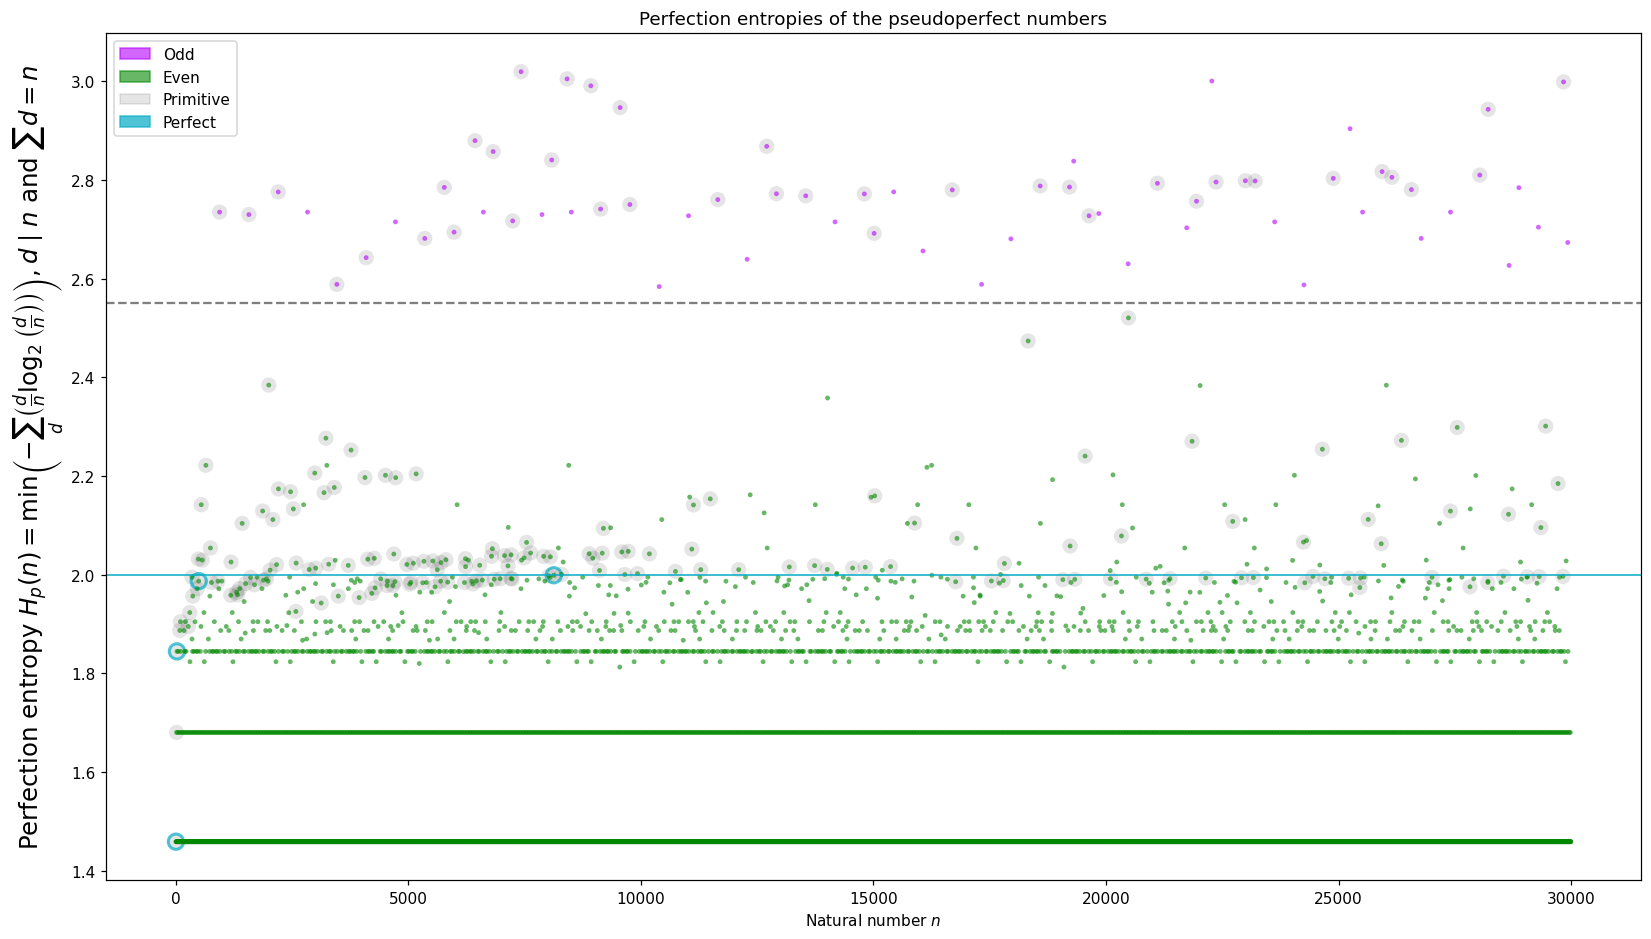

In [93]:
# Get perfection entropies for plotting
x_1 = np.array([p[0] for p in perfection_entropies])
y_1 = np.array([p[1] for p in perfection_entropies])

# Extract primitive pseudos for highlighting
x_2 = x_1[np.isin(x_1, nd.PRIMITIVES)]
y_2 = y_1[np.isin(x_1, nd.PRIMITIVES)]

x_3 = x_1[np.isin(x_1, nd.PERFECTS)]
y_3 = y_1[np.isin(x_1, nd.PERFECTS)]

# Create colourmap
cmap = sns.color_palette("colorblind", 5)

cmap = cc.m_glasbey_bw_minc_20_minl_30.colors[:8] # One example of a distinct, colour-blind accessible palette


# cmap = distinctipy.get_colors(4, pastel_factor=0.5)

# Create colourmap to indicate parity
par_cols = [cmap[1] if n % 2 == 0 else cmap[2] for n in x_1]

# Colourmap to indicate primitives
# prim_cols = ["g" for n in x_1]


# Plotting
plt.figure(figsize=(18, 10), dpi=110)
plt.scatter(x_2, y_2, color='k', s=100, edgecolor='none', alpha=0.1)
plt.scatter(x_3, y_3, color='none', s=100, edgecolor=cmap[3], alpha=0.7, linewidth=2)
plt.scatter(x_1, y_1, color=par_cols, s=10, edgecolor='none', alpha=0.6)
plt.axhline(2, color=cmap[3], linewidth=1)
plt.axhline(2.55, color='k', linestyle='--', alpha = 0.5)

# Labels
plt.xlabel('Natural number $n$')
plt.ylabel(r'Perfection entropy $H_p(n) = \min \left( - \sum_{d} \left( \frac{d}{n} \log_2 \left( \frac{d}{n} \right) \right) \right), d \mid n \text{ and } \sum d = n $', fontsize=16)
plt.title('Perfection entropies of the pseudoperfect numbers')

# Define the proxy artists for the legend
odd_patch = mpatches.Patch(color=cmap[2], label='Odd', alpha=0.6)
even_patch = mpatches.Patch(color=cmap[1], label='Even', alpha=0.6)
prim_patch = mpatches.Patch(color='k', label='Primitive', alpha=0.1)
perf_patch = mpatches.Patch(color=cmap[3], label='Perfect', alpha=0.7)

# Add legend
plt.legend(handles=[odd_patch, even_patch, prim_patch, perf_patch])

plt.savefig("./Perfection_entropies.png", bbox_inches='tight')
plt.show()

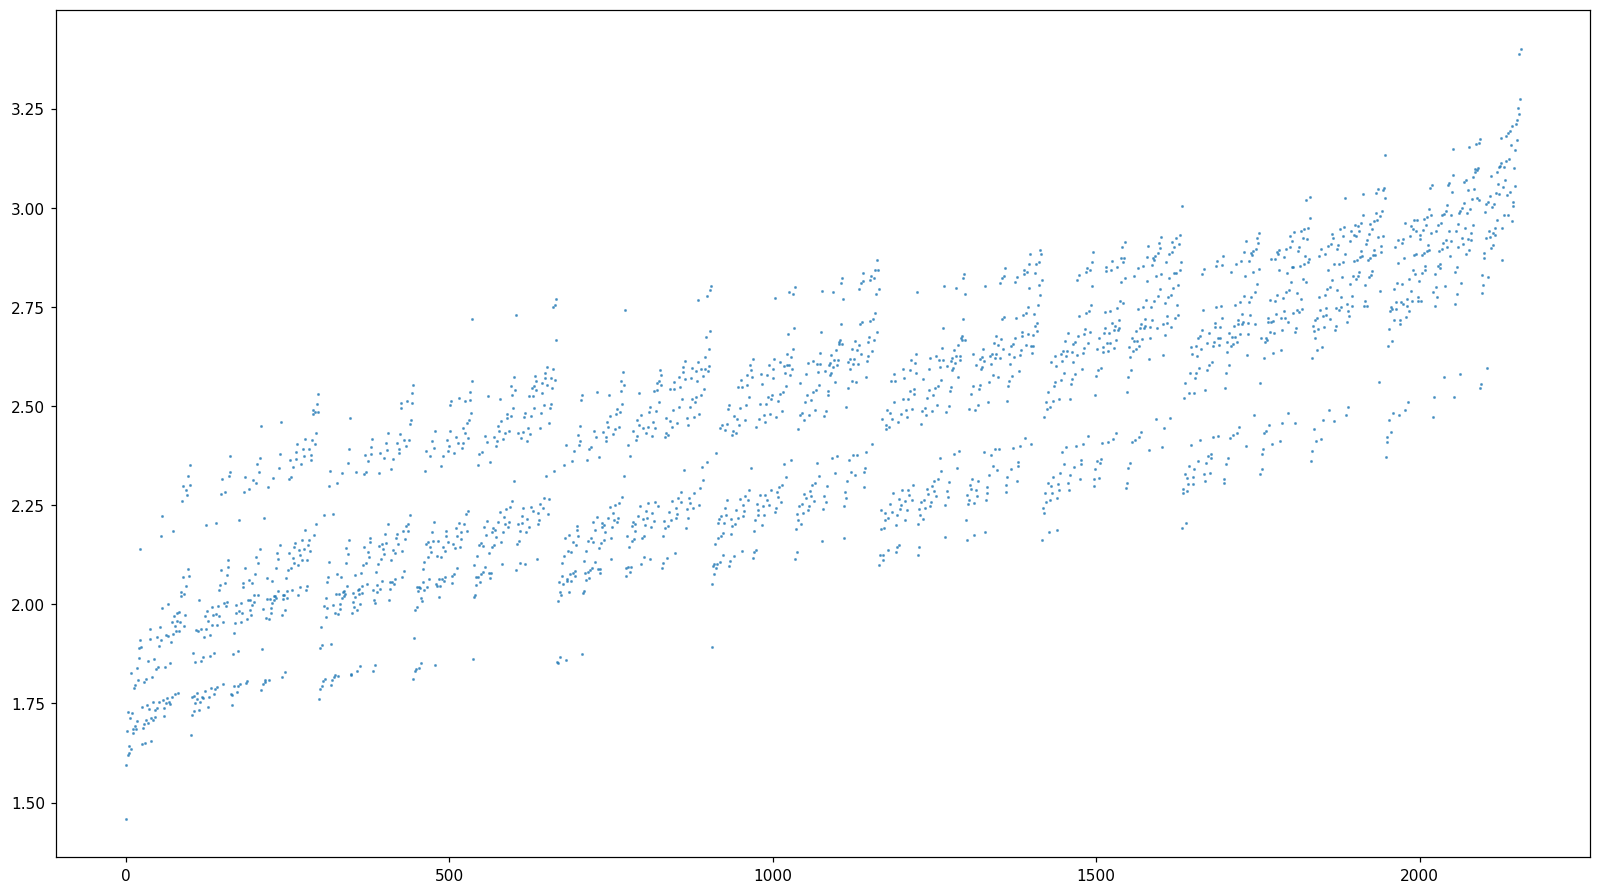

In [40]:
k = nf.perfection_entropy(240, False)
plt.figure(figsize=(18, 10), dpi=110)
plt.scatter(range(len(k)), k, s=1, alpha=.6)

In [ ]:
# weird_perfections = ""
# for i in perfection_entropies:
#     if min(i[1]) != i[1][0]:
#         if i[1].index(min(i[1])) > 2:
#             weird_perfections += f"{i[0]}, {i[1]}, {i[1].index(min(i[1]))}\n"


# with open("C:/Users/danko/iCloudDrive/Projects/Entropy/weird_perfections.txt", "w") as file:
#     file.write(weird_perfections)

In [567]:
d = np.array([(np.prod([(p**(e+1) - 1) / (p-1) for p, e in primes.items()], dtype=np.int64)/2)
              for primes in [nf.]])

In [8]:
np.prod([1, 2, 7, 10, 35, 50, 70, 175], dtype=np.int64)

3001250000

In [33]:
nf.perfection_entropy(240, False)

[1.4591479170272448,
 1.5943609377704335,
 1.6804820237218405,
 1.620973016103023,
 1.7295739585136223,
 1.643459020544157,
 1.624441275057407,
 1.7129831448042583,
 1.8277701240610695,
 1.634817212539378,
 1.726396815424565,
 1.6750582244002983,
 1.6859752582678582,
 1.7897346330875692,
 1.693421094065506,
 1.7971804688852167,
 1.6846019496313538,
 1.8402410118609203,
 1.7067271332318006,
 1.8104865080515113,
 1.890968531773352,
 1.8647869792568113,
 1.9100559822354628,
 2.1396299407490855,
 1.8913990575894006,
 1.6483385146136968,
 1.7399181174988838,
 1.6885795264746175,
 1.6994965603421772,
 1.8032559351618882,
 1.651067773080587,
 1.7084612627089926,
 1.8122206375287035,
 1.7467325842630494,
 1.7008525101725627,
 1.8564915724021291,
 1.735288603949606,
 1.9386174529532685,
 1.9138850620305348,
 1.6562557418215724,
 1.713649231449978,
 1.817408606269689,
 1.7534394195732028,
 1.707559345482716,
 1.8631984077122825,
 1.7146822869183271,
 1.7337697373804382,
 1.8375291122001491,
 1.9

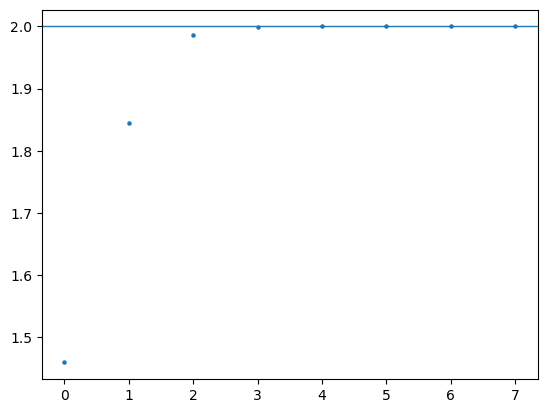

In [2]:
temp = [nf.perfection_entropy(n) for n in nd.PERFECTS[:8]]
plt.scatter(range(8), temp, s=5)
plt.axhline(2, lw=1)